In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("data/output/df_final2010-2018.csv")
lunar_motion = pd.read_csv("moon_distance/moon_distances.csv")

In [6]:
data['l_motion'] = lunar_motion['dists(Km)']

In [7]:
del lunar_motion

In [8]:
data.head()

,datetime,level,rain,vel_wind,dir_wind,l_motion
0,2010-01-01 00:00:00,102.0,0.0,0.2,337.5,353510.208614
1,2010-01-01 01:00:00,100.0,0.0,0.7,315.0,353731.458075
2,2010-01-01 02:00:00,86.0,0.0,1.5,247.5,354197.433405
3,2010-01-01 03:00:00,74.0,0.0,1.3,247.5,354875.253700
4,2010-01-01 04:00:00,65.0,0.0,1.3,247.5,355718.662776


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
data[data['datetime']=="2018-01-01 00:00:00"]

,datetime,level,rain,vel_wind,dir_wind,l_motion
70128,2018-01-01 00:00:00,41.0,0.0,0.2,22.5,352206.989378


In [14]:
data.head()

,datetime,level,rain,vel_wind,dir_wind,l_motion
0,2010-01-01 00:00:00,102.0,0.0,0.2,337.5,353510.208614
1,2010-01-01 01:00:00,100.0,0.0,0.7,315.0,353731.458075
2,2010-01-01 02:00:00,86.0,0.0,1.5,247.5,354197.433405
3,2010-01-01 03:00:00,74.0,0.0,1.3,247.5,354875.253700
4,2010-01-01 04:00:00,65.0,0.0,1.3,247.5,355718.662776


In [15]:
data = data[70128:]

In [17]:
data.reset_index(inplace = True)

8592

In [ ]:
rain_trn = sc.fit_transform(data.rain.values[:len(data)-168])
vel_wind_trn = sc.fit_transform(data.rain.values[:len(data)-168])
dir_wind_trn
l_motion_trn

In [23]:
import statsmodels.api as sm

In [36]:
data['datetime'] = pd.to_datetime(data['datetime'])

C:\Users\fabri\Anaconda3\envs\dsim\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
data.head()

,index,datetime,level,rain,vel_wind,dir_wind,l_motion
0,70128,2018-01-01 00:00:00,41.0,0.0,0.2,22.5,352206.989378
1,70129,2018-01-01 01:00:00,28.0,0.0,0.4,0.0,352754.296176
2,70130,2018-01-01 02:00:00,17.0,0.0,0.9,0.0,353499.724343
3,70131,2018-01-01 03:00:00,12.0,0.0,1.1,0.0,354390.748031
4,70132,2018-01-01 04:00:00,16.0,0.2,1.0,22.5,355366.238020


In [38]:
df = data.set_index(["datetime"])

In [39]:
df.drop(columns = ['index', 'rain', 'vel_wind', 'dir_wind', 'l_motion'], inplace = True)

In [75]:
decomposition = sm.tsa.seasonal_decompose(df[0:100], model='additive')

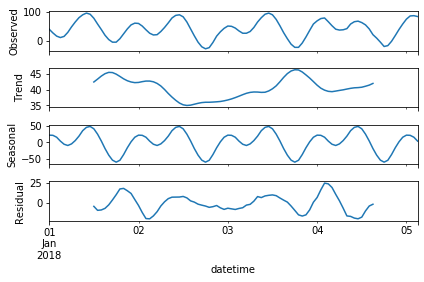

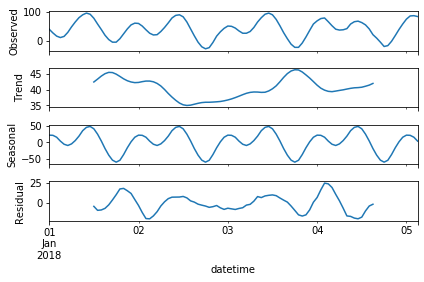

In [76]:
decomposition.plot()

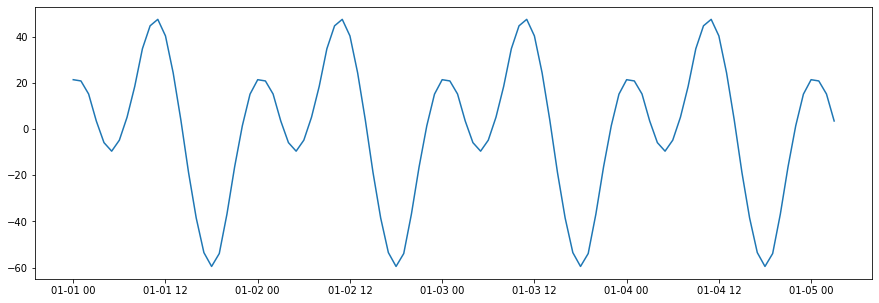

In [77]:
plt.figure(figsize = (15,5))
plt.plot(decomposition.seasonal.level)

In [51]:
import statsmodels

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

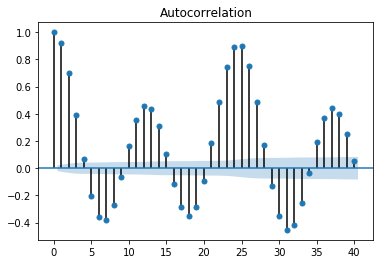

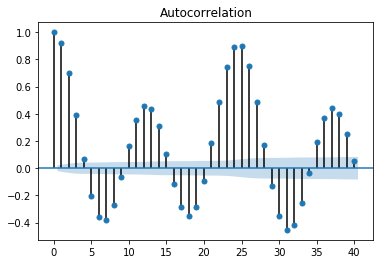

In [56]:
plot_acf(df.level.values)

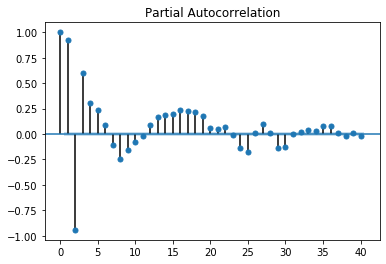

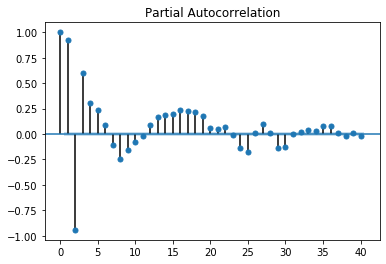

In [57]:
plot_pacf(df.level.values)

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [81]:
data.head()

,index,datetime,level,rain,vel_wind,dir_wind,l_motion
0,70128,2018-01-01 00:00:00,41.0,0.0,0.2,22.5,352206.989378
1,70129,2018-01-01 01:00:00,28.0,0.0,0.4,0.0,352754.296176
2,70130,2018-01-01 02:00:00,17.0,0.0,0.9,0.0,353499.724343
3,70131,2018-01-01 03:00:00,12.0,0.0,1.1,0.0,354390.748031
4,70132,2018-01-01 04:00:00,16.0,0.2,1.0,22.5,355366.238020


In [82]:
model = SARIMAX(df.level.values[:len(df)-168], order = (2,0,2), seasonal_order = (3,0,3,24),
                exog = data.drop(columns = ['index', 'datetime', 'level']).values[:len(data)-168])

In [ ]:
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

In [61]:
yhat = model_fit.forecast(168)

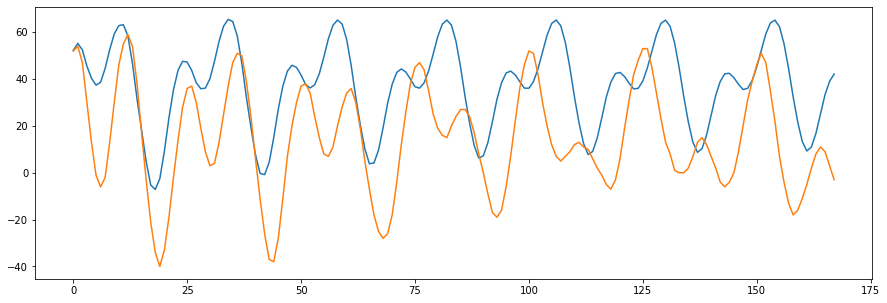

In [63]:
plt.figure(figsize = (15,5))
plt.plot(yhat)
plt.plot(df.level.values[len(data)-168:])

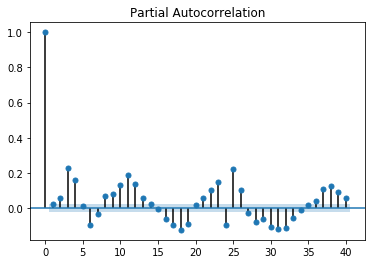

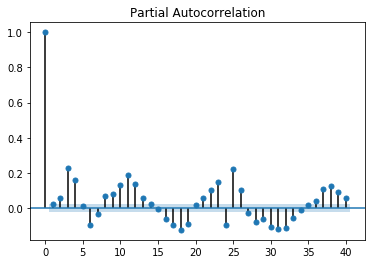

In [68]:
plot_pacf(model_fit.resid)